# 1. Baseline Models for Real Estate Price Prediction – Evaluation and Insights

This notebook focuses on building and comparing baseline machine learning models to predict real estate prices using tabular property data.

We aim to evaluate the strengths and limitations of different regression approaches, such as:

- **Linear Regression**: as a simple interpretable baseline.
- **Random Forest**: a powerful ensemble method for handling non-linearities.
- **Reduced Random Forest**: using only the top features to assess the impact of dimensionality reduction.

For each model, we:

- Train on the available features (`bedroomCount`, `surface`, `postCode`, etc.).
- Predict the target variable: **raw price** in euros.
- Evaluate performance using MAE, RMSE, and R<sup>2</sup> metrics.
- Visualize residuals and prediction errors using 3 diagnostic plots:
  - Residuals vs Predicted
  - Residual Distribution
  - Predicted vs Actual

>  Key insight: The raw price target leads to high error due to extreme variance and lack of normalization. This will be addressed in future notebooks using `price_per_m<sup>2</sup>`, segmentation, and better feature engineering.

This notebook serves as a foundation for improving model robustness and exploring advanced ML techniques in future steps.

## 2. Load and Explore the Dataset

- Load dataset
- df.head(), df.info(), df.describe()
- Visual summary: distributions, correlations, missing values

In [1]:
# 2. Load and Explore the Dataset

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the cleaned dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")

# Display basic structure
print("Dataset loaded successfully!")
print("Shape:", df.shape)

# Display the first rows
df.head()


Dataset loaded successfully!
Shape: (4713, 22)


,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,buildingConstructionYear,facedeCount,floodZoneType,heatingType,kitchenType,hasLivingRoom,toiletCount,hasTerrace,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,2004.0,1.0,NON_FLOOD_ZONE,GAS,SEMI_EQUIPPED,True,1.0,True,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,1910.0,2.0,NON_FLOOD_ZONE,FUELOIL,INSTALLED,True,3.0,True,E,895000.0
2,11,20577219.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Etterbeek,1040,...,1944.0,2.0,NON_FLOOD_ZONE,GAS,NOT_INSTALLED,True,1.0,True,E,370000.0
3,16,20638164.0,https://www.immoweb.be/en/classified/penthouse...,APARTMENT,PENTHOUSE,3.0,1.0,Brussels,Etterbeek,1040,...,1912.0,3.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,3.0,True,B,995000.0
4,20,20634202.0,https://www.immoweb.be/en/classified/penthouse...,APARTMENT,PENTHOUSE,3.0,2.0,Brussels,Etterbeek,1040,...,1912.0,3.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,3.0,True,C,950000.0


In [2]:
# Check column types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713 entries, 0 to 4712
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4713 non-null   int64  
 1   id                        4713 non-null   float64
 2   url                       4713 non-null   object 
 3   type                      4713 non-null   object 
 4   subtype                   4713 non-null   object 
 5   bedroomCount              4713 non-null   float64
 6   bathroomCount             4713 non-null   float64
 7   province                  4713 non-null   object 
 8   locality                  4713 non-null   object 
 9   postCode                  4713 non-null   int64  
 10  habitableSurface          4713 non-null   float64
 11  buildingCondition         4713 non-null   object 
 12  buildingConstructionYear  4713 non-null   float64
 13  facedeCount               4713 non-null   float64
 14  floodZon

In [3]:
# Summary statistics for numerical columns
df.describe()



,Unnamed: 0,id,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,toiletCount,price
count,4713.000000,4.713000e+03,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4.713000e+03
mean,154414.024825,1.998926e+07,3.222364,1.497348,3947.335031,188.318056,1966.852536,2.852323,1.970719,5.052543e+05
std,114278.667244,2.156456e+06,1.494682,0.927808,2820.944861,135.211317,40.577392,0.875193,1.154636,4.776696e+05
min,0.000000,9.332176e+06,1.000000,1.000000,1000.000000,26.000000,1757.000000,1.000000,1.000000,5.900000e+04
25%,11269.000000,2.040230e+07,2.000000,1.000000,1410.000000,105.000000,1948.000000,2.000000,1.000000,2.650000e+05
50%,183261.000000,2.054678e+07,3.000000,1.000000,2940.000000,155.000000,1970.000000,3.000000,2.000000,3.750000e+05
75%,238961.000000,2.061882e+07,4.000000,2.000000,6180.000000,225.000000,1998.000000,4.000000,2.000000,5.690000e+05
max,440364.000000,2.066435e+07,25.000000,14.000000,9990.000000,3412.000000,2026.000000,8.000000,17.000000,6.950000e+06


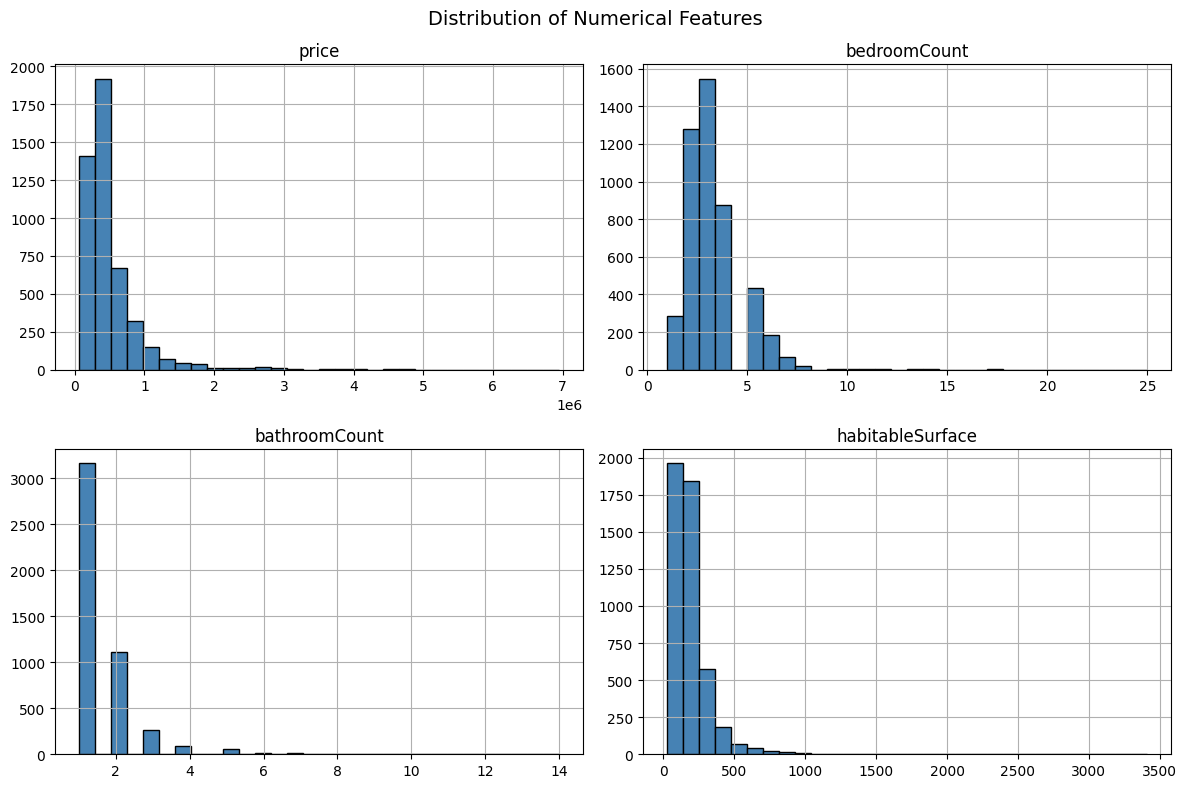

In [4]:
# Plot distributions of key numerical variables
numerical_cols = ['price', 'bedroomCount', 'bathroomCount', 'habitableSurface']
df[numerical_cols].hist(figsize=(12, 8), bins=30, color="steelblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

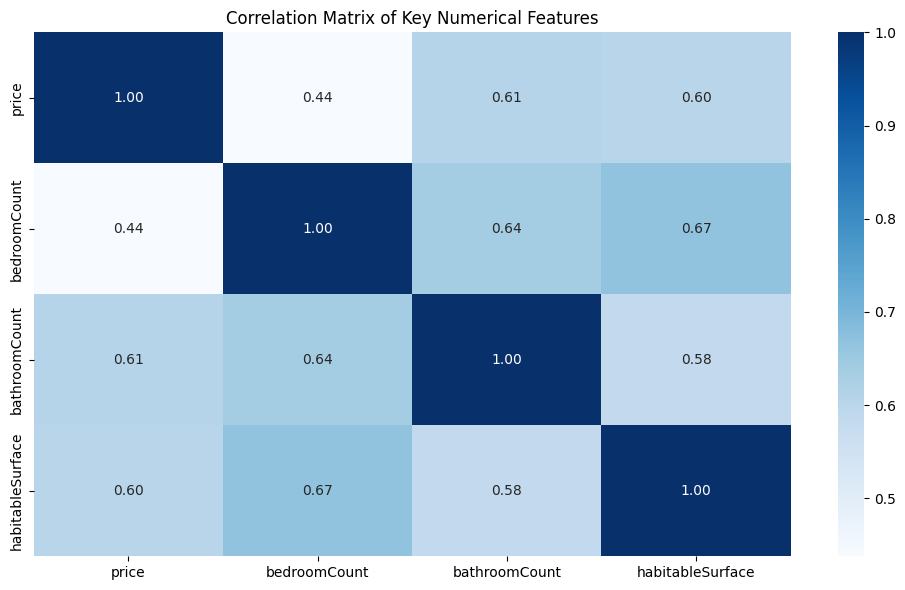

In [5]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Key Numerical Features")
plt.tight_layout()
plt.show()

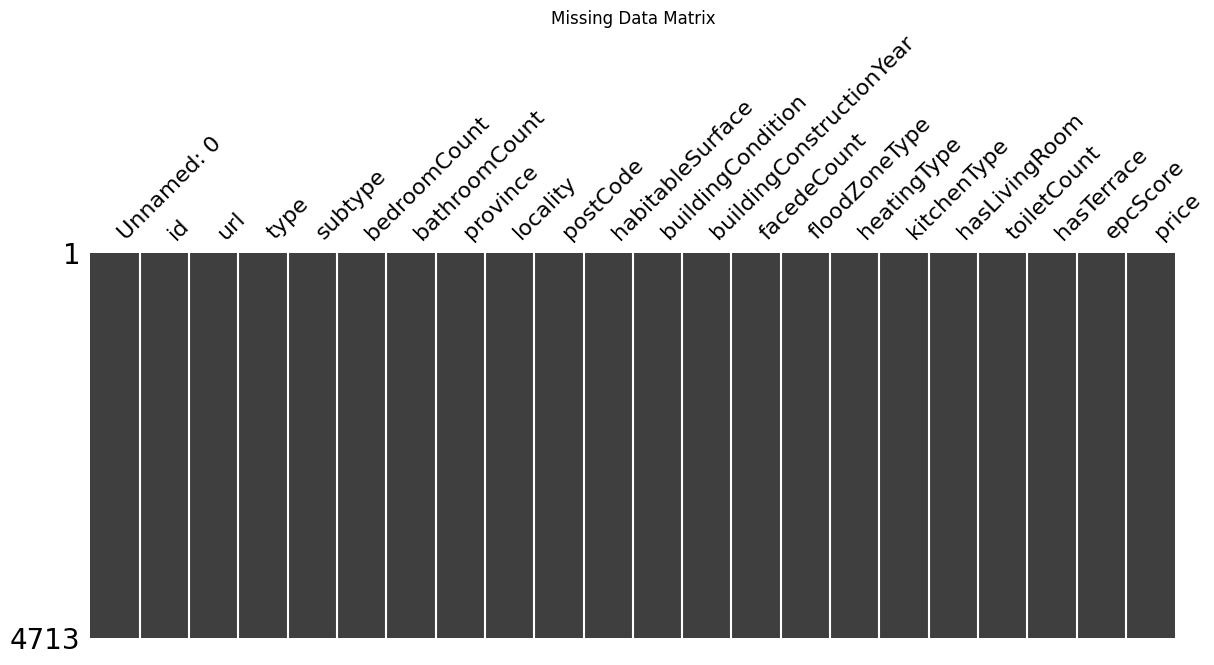

In [6]:
# Visualize missing values using missingno
msno.matrix(df, figsize=(14, 5), sparkline=False)
plt.title("Missing Data Matrix")
plt.show()

In [7]:
import pandas as pd

# Remplace le chemin par le bon chemin vers ton fichier
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")

# Vérification rapide
print("Dataset loaded with shape:", df.shape)

# Separate columns by data type
quantitative_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()
qualitative_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Display results
print("Quantitative Variables (Numerical):")
for col in quantitative_cols:
    print(f" - {col}")

print("\n Qualitative Variables (Categorical):")
for col in qualitative_cols:
    print(f" - {col}")

Dataset loaded with shape: (4713, 22)
Quantitative Variables (Numerical):
 - Unnamed: 0
 - id
 - bedroomCount
 - bathroomCount
 - postCode
 - habitableSurface
 - buildingConstructionYear
 - facedeCount
 - toiletCount
 - price

 Qualitative Variables (Categorical):
 - url
 - type
 - subtype
 - province
 - locality
 - buildingCondition
 - floodZoneType
 - heatingType
 - kitchenType
 - hasLivingRoom
 - hasTerrace
 - epcScore


## 3.0 Preparing the Dataset for Machine Learning

Before training any supervised or unsupervised model, we must clean, transform, and encode the raw dataset.

### Objectives:
- Remove non-informative columns (IDs, URLs)
- Handle missing values
- Encode categorical variables
- Convert boolean columns to numerical
- Select useful features for modeling
- Save a clean dataset for reuse

This step ensures the data is consistent, numerical, and machine-readable.

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
print(f"Dataset shape before cleaning: {df.shape}")

# 2. Drop non-informative columns
df.drop(columns=["Unnamed: 0", "id", "url"], inplace=True)

# 3. Convert booleans (from string to int)
bool_cols = ['hasLivingRoom', 'hasTerrace']
for col in bool_cols:
    df[col] = df[col].astype(str).str.lower().map({'true': 1, 'false': 0})
    df[col] = df[col].fillna(0).astype(int)

# 4. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in bool_cols]

# 5. Handle missing values for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('price')  # Exclude target from imputing

# 6. Drop rows with missing target
df = df.dropna(subset=['price'])

# 7. Apply preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
], remainder="passthrough")

# Fit and transform
X_prepared = preprocessor.fit_transform(df.drop(columns=["price"]))
target = df["price"].values

# 8. Reconstruct into DataFrame
# Get feature names
num_features = numeric_cols
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)
other_features = [col for col in df.columns if col not in (categorical_cols + numeric_cols + ["price"])]

final_columns = list(num_features) + list(cat_features) + other_features

# Combine features and target
df_model = pd.DataFrame(X_prepared, columns=final_columns)
df_model["price"] = target

# 9. Save final dataset
output_path = "../data/immoweb_real_estate_ml_ready.csv"
df_model.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")
print(f"Final shape: {df_model.shape}")


Dataset shape before cleaning: (4713, 22)
Cleaned dataset saved to: ../data/immoweb_real_estate_ml_ready.csv
Final shape: (4713, 1304)


In [9]:
import pandas as pd

# Load the saved dataset
df_model = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# Display shape and column names
dataset_shape = df_model.shape
column_names = df_model.columns.tolist()

# Display first few rows for inspection
sample_data = df_model.head()

# Display the first few rows and column names
print("Sample of the cleaned ML dataset:")
display(sample_data)

print("\nColumn names:")
print(df_model.columns.tolist())

# donne la liste de tous les champs quantitatifs et qualitatifs
quantitative_cols = df_model.select_dtypes(include=["int", "float"]).columns.tolist() 

# et qulitatif 
qualitative_cols = df_model.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Identify quantitative (numerical) columns
quantitative_cols = df_model.select_dtypes(include=["int", "float"]).columns.tolist()

# Identify qualitative (categorical or boolean) columns
qualitative_cols = df_model.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Display results
print("Quantitative Variables (Numerical):")
for col in quantitative_cols:
    print(f" - {col}")

print("\nQualitative Variables (Categorical or Boolean):")
if qualitative_cols:
    for col in qualitative_cols:
        print(f" - {col}")
else:
    print(" - None (all categorical features have been one-hot encoded)")



Sample of the cleaned ML dataset:


,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,toiletCount,type_APARTMENT,type_HOUSE,subtype_APARTMENT,...,epcScore_A++,epcScore_B,epcScore_C,epcScore_D,epcScore_E,epcScore_F,epcScore_G,hasLivingRoom,hasTerrace,price
0,2.0,1.0,1040.0,100.0,2004.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,399000.0
1,4.0,2.0,1040.0,270.0,1910.0,2.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,895000.0
2,3.0,1.0,1040.0,119.0,1944.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,370000.0
3,3.0,1.0,1040.0,198.0,1912.0,3.0,3.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,995000.0
4,3.0,2.0,1040.0,220.0,1912.0,3.0,3.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,950000.0



Column names:
['bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'facedeCount', 'toiletCount', 'type_APARTMENT', 'type_HOUSE', 'subtype_APARTMENT', 'subtype_APARTMENT_BLOCK', 'subtype_BUNGALOW', 'subtype_CASTLE', 'subtype_CHALET', 'subtype_COUNTRY_COTTAGE', 'subtype_DUPLEX', 'subtype_EXCEPTIONAL_PROPERTY', 'subtype_FARMHOUSE', 'subtype_FLAT_STUDIO', 'subtype_GROUND_FLOOR', 'subtype_HOUSE', 'subtype_LOFT', 'subtype_MANOR_HOUSE', 'subtype_MANSION', 'subtype_MIXED_USE_BUILDING', 'subtype_PENTHOUSE', 'subtype_SERVICE_FLAT', 'subtype_TOWN_HOUSE', 'subtype_TRIPLEX', 'subtype_VILLA', 'province_Antwerp', 'province_Brussels', 'province_East Flanders', 'province_Flemish Brabant', 'province_Hainaut', 'province_Limburg', 'province_Liège', 'province_Luxembourg', 'province_Namur', 'province_Walloon Brabant', 'province_West Flanders', "locality_'S-GRAVENWEZEL", 'locality_AALST', 'locality_AARSCHOT', 'locality_AARTSELAAR', 'locality_AMPSIN', 'locality_ANDERL

# 3. Supervised Learning

## 3.1 Regression (e.g., predicting property price)
- **Models**:
  - Linear Regression
  - Random Forest Regressor
- **Evaluation**:
  - MAE, RMSE, R<sup>2</sup>
- **Visualizations**:
  - Scatter plot (actual vs predicted)
  - Residual distribution


In [12]:
df_model = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# List of all columns actually present in the dataset
available_columns = df.columns.tolist()

features = [
    'bedroomCount',
    'bathroomCount',
    'postCode',
    'habitableSurface',
    'buildingConstructionYear',
    'toiletCount',
    'hasLivingRoom',
    'hasTerrace'
]

# Keep only features that exist in the dataset
valid_features = [col for col in features if col in available_columns]

# Check if target column is present
target = "price"
if target not in available_columns:
    raise ValueError(f"Target column '{target}' is missing from the dataset.")

# Print summary
print("Features found in dataset:", valid_features)
print("Features missing from dataset:", [col for col in features if col not in available_columns])

# Select the final dataframe with valid features and target
df_model = df[valid_features + [target]].dropna()


Features found in dataset: ['bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'toiletCount', 'hasLivingRoom', 'hasTerrace']
Features missing from dataset: []


In [13]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Load dataset ===
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# === Define features and target ===
valid_features = [
    'bedroomCount',
    'bathroomCount',
    'postCode',
    'habitableSurface',
    'buildingConstructionYear',
    'toiletCount',
    'hasLivingRoom',
    'hasTerrace'
]
target = "price"
df_model = df[valid_features + [target]].dropna()

# === Split full dataset ===
X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Train full Random Forest model ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# === Feature importance ===
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)
top_features = feature_importance_df.head(8)["feature"].tolist()

# === Train reduced model on top features ===
X_reduced = X[top_features]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_red, y_train_red)

# === Make predictions and compute residuals ===
y_pred_red = rf_reduced.predict(X_test_red)
residuals = y_test_red - y_pred_red

# === Evaluation metrics ===
mae = mean_absolute_error(y_test_red, y_pred_red)
rmse = mean_squared_error(y_test_red, y_pred_red, squared=False)
r2 = r2_score(y_test_red, y_pred_red)

# === Display results ===
print("Reduced Random Forest Evaluation:")
print(f"  MAE:  {mae:,.2f} €")
print(f"  RMSE: {rmse:,.2f} €")
print(f"  R²:   {r2:.4f}")
print("-" * 40)

# === Optional: Formatter for Euro currency ===
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}€')


Reduced Random Forest Evaluation:
  MAE:  116,729.59 €
  RMSE: 236,487.13 €
  R²:   0.7345
----------------------------------------


e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


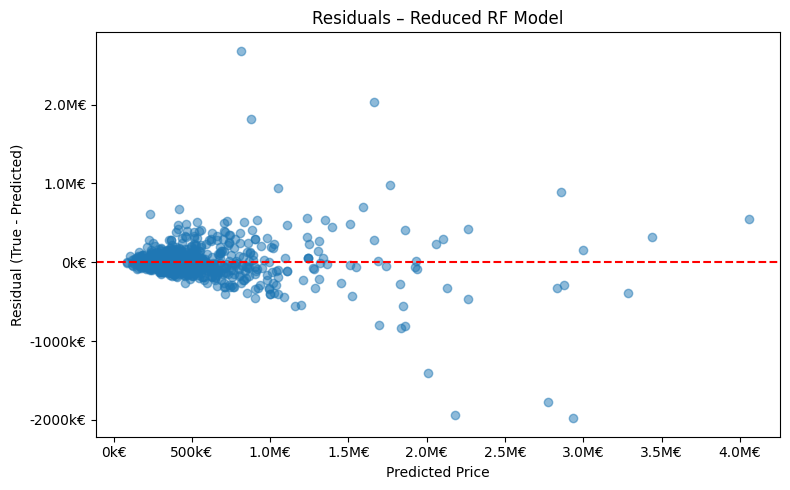

In [ ]:
# === Formatter for axis in euros ===
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M€' if x >= 1_000_000 else f'{x/1_000:.0f}k€')

# === Plot 1: Residuals vs Predicted Price ===
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_red, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals – Reduced RF Model")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()



##  Residuals vs Predicted Price

###  What it shows:
- **X-axis:** Predicted price by the model  
- **Y-axis:** Residuals = (Actual – Predicted)  
- Each dot represents a property in the test set.

###  Why it's useful:
- Helps identify **systematic errors** and potential **bias** in the model.
- Ideally, residuals should be randomly scattered around 0, showing no clear pattern.
- If residuals grow with price (as in your case), it suggests the model performs **worse on higher-value properties**.
- Useful for spotting **heteroscedasticity** (variance of errors increases with price).


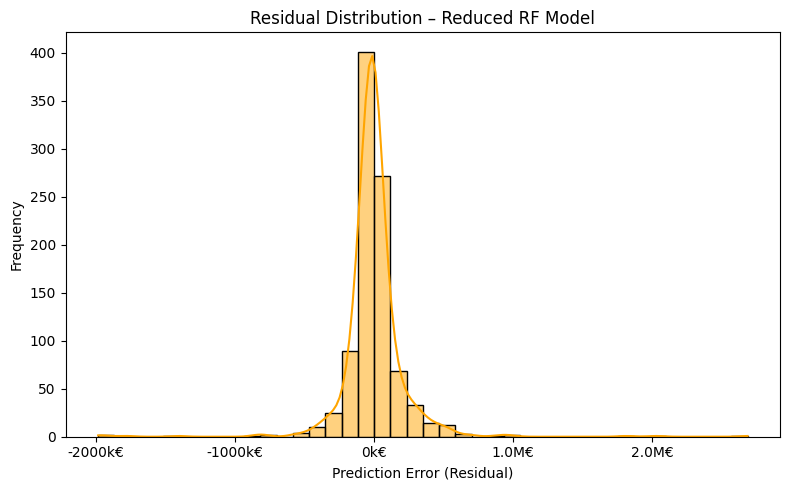

In [ ]:
# === Plot 2: Residual Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="orange")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – Reduced RF Model")
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()



## Residual Distribution Histogram

### What it shows:
- **X-axis:** Prediction error (residuals)  
- **Y-axis:** Frequency of those residuals  
- Displays the **distribution of all prediction errors**.

### Why it's useful:
- Helps assess whether the model's errors are **normally distributed** or **skewed**.
- A bell-shaped curve centered around zero is ideal.
- A wide spread or heavy tails indicate **large errors** and potentially outliers.
- Reveals **how often** the model is off by large amounts.

In [ ]:
# === Plot 3: Predicted vs Actual ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test_red, y_pred_red, alpha=0.5)
plt.plot([y_test_red.min(), y_test_red.max()], [y_test_red.min(), y_test_red.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual – Reduced RF Model")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

##  Predicted vs Actual Price

###  What it shows:
- **X-axis:** Actual observed prices  
- **Y-axis:** Prices predicted by the model  
- The red dashed line represents **perfect prediction (y = x)**.

###  Why it's useful:
- Directly visualizes how closely the model's predictions match the true values.
- Points should ideally align along the red diagonal.
- Systematic deviations (e.g., under the line) indicate **bias** (e.g., underestimation of expensive properties).
- Helps detect **model drift or segmentation gaps**, especially for **luxury/high-end markets**.

---

## Summary Table

| Plot                       | X-axis            | Y-axis             | Purpose                                                          |
|----------------------------|-------------------|--------------------|------------------------------------------------------------------|
| Residuals vs Predicted     | Predicted price   | Actual – Predicted | Detects bias, heteroscedasticity, and outliers                  |
| Residual Distribution      | Prediction error  | Frequency          | Evaluates error symmetry, spread, and normality                 |
| Predicted vs Actual        | True price        | Predicted price    | Assesses overall prediction accuracy and deviation from ideal   |

## Model Evaluation Summary

### Linear Regression

- **MAE (Mean Absolute Error):** &euro;177,329.45  
  This indicates that, on average, the predicted property prices deviate from the actual prices by approximately &euro;177,000.  
  MAE gives a direct measure of average error, without giving extra weight to large errors.

- **RMSE (Root Mean Squared Error):** &euro;327,125.44  
  This metric penalizes larger errors more than MAE.  
  The significant gap between RMSE and MAE suggests the presence of extreme outliers or high variance in some predictions.

- **R<sup>2</sup> (R-squared):** 0.4921  
  The model explains about 49.2% of the variability in the property prices.  
  This is a modest performance, typical of linear models on complex and non-linear datasets like real estate data.

---

### Random Forest Regressor

- **MAE:** &euro;116,728.60  
  A much lower average error than linear regression, indicating stronger prediction accuracy.

- **RMSE:** &euro;236,490.55  
  Lower than that of the linear model, showing the model's better handling of large errors.

- **R<sup>2</sup>:** 0.7345  
  The model explains approximately 73.5% of the variance in property prices, a solid performance for a non-linear ensemble model.

---

### Reduced Random Forest Regressor

- **MAE:** &euro;116,729.59  
  Almost identical to the full model, meaning that a reduced set of features performs just as well.

- **RMSE:** &euro;236,487.13  
  Similarly close to the full model, reinforcing the usefulness of feature selection for interpretability and efficiency.

- **R<sup>2</sup>:** 0.7345  
  The same explanatory power is maintained with fewer input features.

---

## Interpretation

- **MAE** reflects the average absolute prediction error — lower is better.  
- **RMSE** penalizes larger errors and is sensitive to outliers — a large gap between RMSE and MAE suggests variability or extreme cases.  
- **R<sup>2</sup>** (coefficient of determination) quantifies how well the model explains the variability of the target variable — closer to 1 is better.

The Random Forest model significantly outperforms Linear Regression across all metrics, confirming the importance of capturing non-linear relationships and feature interactions. Additionally, the reduced Random Forest maintains performance while improving model simplicity.

---

## Example Prediction

A sample prediction using the Random Forest model yields an estimated property price of:

**&euro;462,020.00**

This demonstrates the model's readiness to support practical use cases, such as real estate valuation.


---
## Next Steps

### Analyze Model Behavior

- Examine feature importances to understand which variables have the most influence on predictions.
- Investigate residuals and outliers to improve data quality or remove noise.

### Try Advanced Models

- Test gradient boosting models such as **XGBoost**, **LightGBM**, or **CatBoost**.
- Apply **hyperparameter tuning** using `GridSearchCV` or Bayesian optimization (e.g. with `Optuna`).

### Improve Data Quality and Features

- Add **geographic coordinates** (latitude and longitude) to capture fine-grained location effects.
- Create **geographical clusters** or groupings (e.g., by city, province, or region).
- Include **local market indicators**, such as average or median price per city or postcode.

### Specialize Models

- Train **separate models per region** (e.g., Brussels, Flanders, Wallonia) to reduce variance and improve local accuracy.
- Consider modeling **price per square meter** to normalize across different property sizes.

### Deployment Options

- Deploy a **prediction API** using `Flask` or `FastAPI`.
- Build a simple **user interface or web demo** to showcase real-time predictions.
- Add the model to an existing platform or dashboard.


## 4. Feature Importance

This section aims to understand which features most strongly influence the predictions of our Random Forest model.

### 4.1 Extracting Feature Importances
We will use the `feature_importances_` attribute of the trained Random Forest model to quantify the relative importance of each input feature.

### 4.2 Visualizing Top Features
We will plot the top 10 to 15 most important variables using a bar chart, allowing a quick comparison of their contribution to the model's predictions.

### 4.3 Interpretation and Discussion
We will analyze the most influential features and provide interpretation:
- Which variables contribute most to the price prediction?
- Are these results consistent with domain knowledge (e.g., surface, location)?
- Are there surprising variables with high or low importance?

This step helps both in improving the model and in gaining business insights into what drives real estate prices.


C:\Users\Neo\AppData\Local\Temp\ipykernel_6236\3218554582.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(15), x="importance", y="feature", palette="viridis")


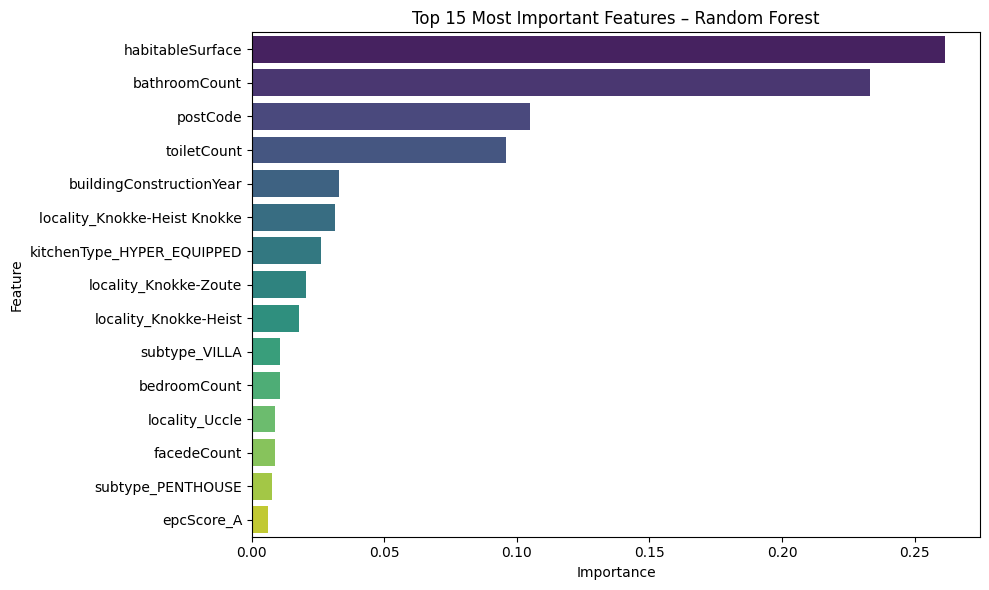

,feature,importance
3,habitableSurface,0.261619
1,bathroomCount,0.233371
2,postCode,0.105011
6,toiletCount,0.095757
4,buildingConstructionYear,0.032759
621,locality_Knokke-Heist Knokke,0.031442
1284,kitchenType_HYPER_EQUIPPED,0.026102
622,locality_Knokke-Zoute,0.020242
620,locality_Knokke-Heist,0.017823
29,subtype_VILLA,0.010618


In [ ]:
# === 4.1 Extracting Feature Importances ===

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use the actual feature names from X (training data)
feature_names = X.columns

# Get feature importances from trained Random Forest model
importances = rf_model.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# === 4.2 Visualizing Top Features ===

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(15), x="importance", y="feature", palette="viridis")
plt.title("Top 15 Most Important Features – Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Optional: display full importance table
feature_importance_df.head(25)



## 5. Reduced Model with Top Features

### 5.1 Select Top N Features
Extract most influential features from Random Forest.

### 5.2 Retrain Model on Reduced Dataset
Train Random Forest again with fewer variables.

### 5.3 Evaluate Reduced Model
Compare performance vs full model (MAE, RMSE, R<sup>2</sup>).

### 5.4 Visual Comparison
Scatter plots and residual histograms to assess behavior.


Linear Regression Evaluation:
  MAE:  177,329.45 €
  RMSE: 327,125.44 €
  R²:   0.4921
----------------------------------------
Random Forest Regressor Evaluation:
  MAE:  116,728.60 €
  RMSE: 236,490.55 €
  R²:   0.7345
----------------------------------------
Reduced Random Forest Evaluation:
  MAE:  116,729.59 €
  RMSE: 236,487.13 €
  R²:   0.7345
----------------------------------------


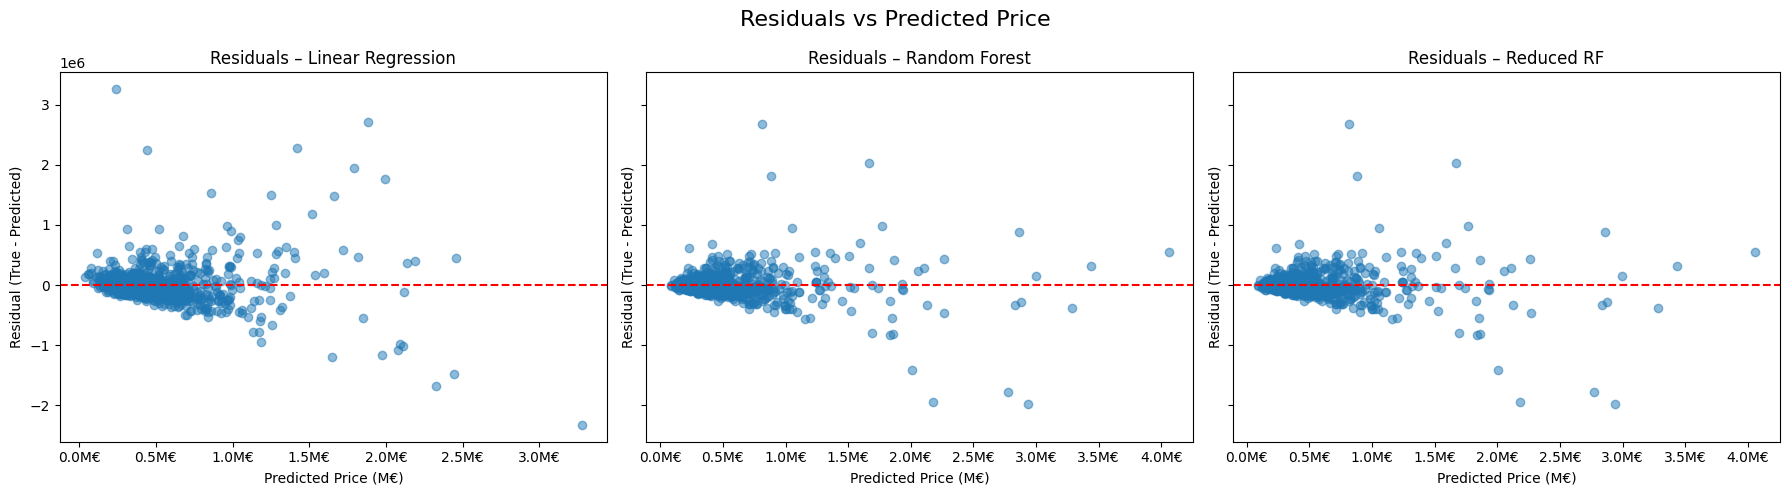

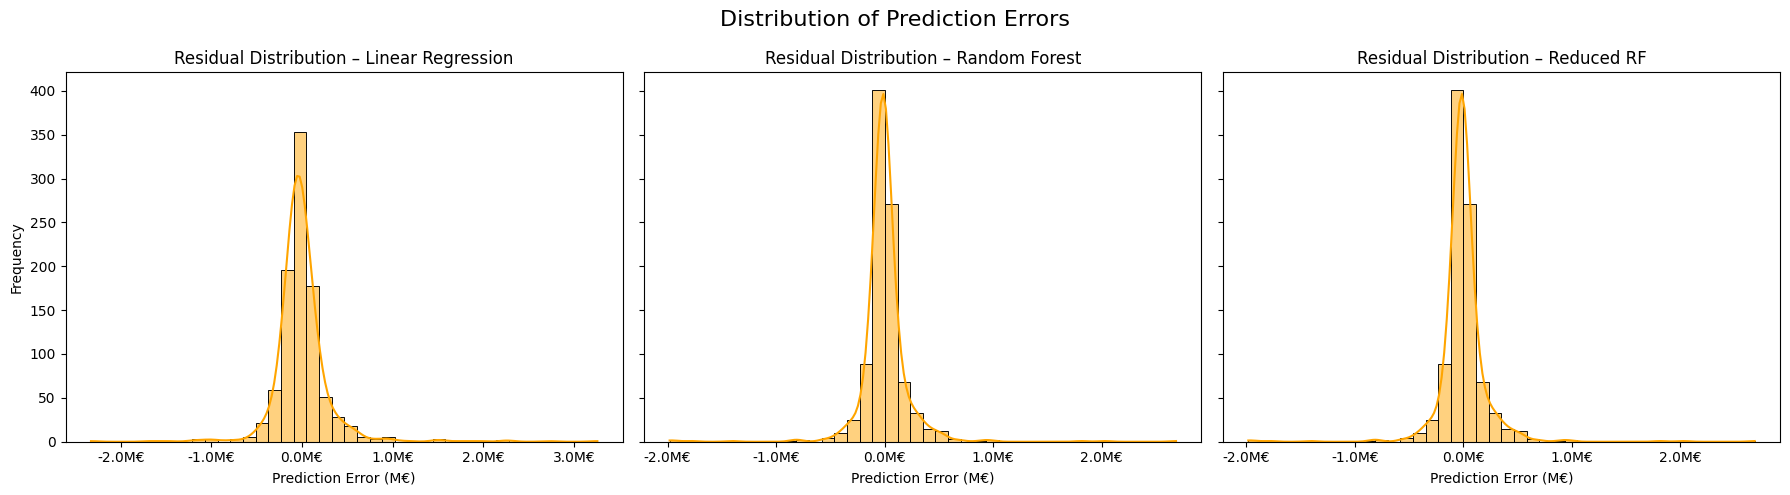

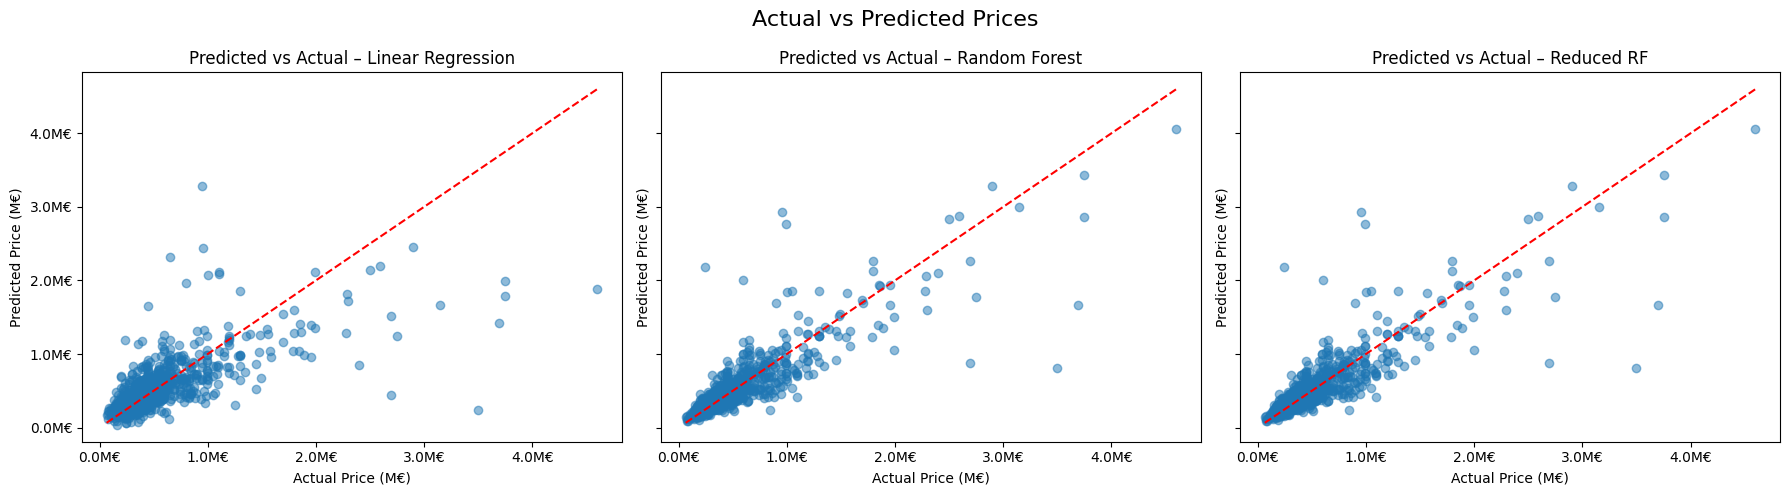

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# === Load dataset ===
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# === Filter invalid prices or surfaces ===
df = df[(df["price"] > 0) & (df["habitableSurface"] > 0)].dropna(subset=["price", "habitableSurface"])

# === Full list of expected features ===
features = [
    'bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface',
    'buildingConstructionYear', 'facadeCount', 'toiletCount',
    'type', 'subtype', 'province', 'locality', 'buildingCondition',
    'floodZoneType', 'heatingType', 'kitchenType',
    'hasLivingRoom', 'hasTerrace', 'epcScore'
]
target = "price"

# === Keep only available features ===
available_features = [f for f in features if f in df.columns]
df_model = df[available_features + [target]].dropna()

# Identify categorical features
categorical_cols = [col for col in available_features if df_model[col].dtype == "object"]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# === Define X and y ===
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# === Split into train/test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Train Linear Regression ===
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# === Train Random Forest ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# === Feature importance from RF ===
top_n = 15
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

top_features = feature_importance_df.head(top_n)["feature"].tolist()

# === Reduced dataset ===
X_reduced = X[top_features]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# === Retrain RF on reduced features ===
rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_red, y_train_red)
y_pred_red = rf_reduced.predict(X_test_red)

# === Evaluation function ===
def print_model_evaluation(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Evaluation:")
    print(f"  MAE:  {mae:,.2f} €")
    print(f"  RMSE: {rmse:,.2f} €")
    print(f"  R²:   {r2:.4f}")
    print("-" * 40)
    return mae, rmse, r2

# ==================================================================
# === Compare All Models 
# ==================================================================

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Formatter to convert large numbers to millions of euros (e.g., 1500000 → '1.5M€')
def millions(x, pos):
    return f'{x * 1e-6:.1f}M€'

# Evaluate all three models using MAE, RMSE, and R² metrics.
results_lr = print_model_evaluation("Linear Regression", y_test, y_pred_lr)
results_rf = print_model_evaluation("Random Forest Regressor", y_test, y_pred_rf)
results_red = print_model_evaluation("Reduced Random Forest", y_test_red, y_pred_red)

# Plot residuals (True - Predicted) against predicted values for all models.
# X-axis is formatted in millions of euros.
def plot_residuals_all(models):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    formatter = FuncFormatter(millions)

    for ax, (y_true, y_pred, name) in zip(axes, models):
        residuals = y_true - y_pred
        ax.scatter(y_pred, residuals, alpha=0.5)
        ax.axhline(0, color='red', linestyle='--')
        ax.set_title(f"Residuals – {name}")
        ax.set_xlabel("Predicted Price (M€)")
        ax.set_ylabel("Residual (True - Predicted)")
        ax.xaxis.set_major_formatter(formatter)

    fig.suptitle("Residuals vs Predicted Price", fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
plot_residuals_all([
    (y_test, y_pred_lr, "Linear Regression"),
    (y_test, y_pred_rf, "Random Forest"),
    (y_test_red, y_pred_red, "Reduced RF")
])

# Plot histogram of residuals for each model.
# X-axis shows prediction error in millions of euros.
def plot_residual_distribution_all(models):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    formatter = FuncFormatter(millions)

    for ax, (y_true, y_pred, name) in zip(axes, models):
        residuals = y_true - y_pred
        sns.histplot(residuals, kde=True, bins=40, color="orange", ax=ax)
        ax.set_title(f"Residual Distribution – {name}")
        ax.set_xlabel("Prediction Error (M€)")
        ax.set_ylabel("Frequency")
        ax.xaxis.set_major_formatter(formatter)

    fig.suptitle("Distribution of Prediction Errors", fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
plot_residual_distribution_all([
    (y_test, y_pred_lr, "Linear Regression"),
    (y_test, y_pred_rf, "Random Forest"),
    (y_test_red, y_pred_red, "Reduced RF")
])

# Plot actual vs predicted prices for all models.
# Both axes are shown in millions of euros.
def plot_predicted_vs_actual_all(models):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
    formatter = FuncFormatter(millions)

    for ax, (y_true, y_pred, name) in zip(axes, models):
        ax.scatter(y_true, y_pred, alpha=0.5)
        ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        ax.set_title(f"Predicted vs Actual – {name}")
        ax.set_xlabel("Actual Price (M€)")
        ax.set_ylabel("Predicted Price (M€)")
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)

    fig.suptitle("Actual vs Predicted Prices", fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
plot_predicted_vs_actual_all([
    (y_test, y_pred_lr, "Linear Regression"),
    (y_test, y_pred_rf, "Random Forest"),
    (y_test_red, y_pred_red, "Reduced RF")
])


# Evaluation of Regression Models on Real Estate Price Prediction

## Context

Three models were evaluated on a cleaned real estate dataset:

- Linear Regression  
- Random Forest  
- Reduced Random Forest (using top 15 features)

Each model was assessed using three visualization types:

- Residuals vs Predicted Price  
- Residual Distribution  
- Actual vs Predicted Prices

---

## 1. Residuals vs Predicted Price

**Residual = True Price − Predicted Price**  
Ideally, residuals should be centered around 0, with no visible pattern.

| Model | Key Insights |
|-------|--------------|
| Linear Regression | - Residuals remain close to zero for predicted prices below 1 million euros, but deviate strongly beyond that.  
- There is a clear funnel-shaped pattern, indicating heteroscedasticity: the error increases with the predicted price.  
- The model significantly underestimates high-value properties (residuals become strongly positive). |
| Random Forest | - Residuals are tightly centered around 0 for the majority of predictions.  
- From 1.5M to 4M euros, predictions remain stable but with a slight increase in variance.  
- Very few extreme residuals, suggesting better robustness for expensive properties. |
| Reduced RF | - Similar behavior to the full Random Forest model.  
- Slightly more spread at the high end, but still within acceptable error bounds.  
- Shows that feature reduction did not heavily impact prediction quality. |

---

## 2. Residual Distribution

This histogram shows how errors (residuals) are distributed.

| Model | Key Insights |
|-------|--------------|
| Linear Regression | - The distribution is centered around 0, but is much wider than the others.  
- There are many errors larger than ±1 million euros, indicating weak generalization.  
- Peak frequency is around 400 instances with very low error — the model fits small prices well. |
| Random Forest | - Very sharp and narrow distribution, tightly concentrated around 0.  
- Indicates that most prediction errors are small.  
- Almost no outliers beyond ±1 million euros. |
| Reduced RF | - Nearly identical to full RF.  
- A few more medium-sized errors, but still tightly grouped.  
- Suggests that top features carry most of the model's performance. |

**Interpretation of vertical bar (~400 frequency):**  
This bar represents the number of predictions with near-zero error.  
For Random Forest models, about 400 test samples had errors close to 0 euro, confirming excellent precision for common price ranges.

---

## 3. Actual vs Predicted Prices

Ideally, all points lie on the diagonal line (perfect predictions).

| Model | Key Insights |
|-------|--------------|
| Linear Regression | - Performs well below 1 million euros, but diverges significantly beyond that.  
- Systematically underpredicts high prices — for example, properties actually worth 2.5 million euros may be predicted at around 1.5 million. |
| Random Forest | - Points are well aligned with the diagonal.  
- Handles both low- and high-end property prices effectively.  
- Only minor dispersion at the top end of the price range. |
| Reduced RF | - Slightly looser fit at the extremes, but preserves alignment with actual prices.  
- Good compromise between simplicity and performance. |

---

## Final Summary

- Random Forest is clearly the most accurate model across the entire price spectrum.  
- Reduced RF is nearly as good, and offers better interpretability with fewer features.  
- Linear Regression is insufficient for this task, especially for properties above 1 million euros.

---

## Recommendation

For real estate pricing in Belgium, where luxury properties and large variance exist, non-linear models like Random Forests are necessary.  
Simple linear models are too rigid and prone to biased estimations, particularly for high-value segments.


## 6. Next Steps & Advanced Modeling

Based on the current performance and error analysis, several strategic improvements can be explored to increase prediction accuracy, generalization, and real-world applicability.

---

### 6.1 Analyze Model Behavior

- **Residual analysis**:  
  Examine residuals to identify systematic errors, outliers, or patterns missed by the model.

- **Variable interactions**:  
  Analyze interaction effects or non-linear influences between features (e.g., size vs. location).

- **Outlier impact**:  
  Identify and treat outliers that may skew results or inflate RMSE.

##  Residual Distribution – Random Forest

This plot shows the **distribution of prediction errors** (residuals) for the Random Forest model.

---

### What the Graph Shows

#### 1. Horizontal axis (x-axis) – **Prediction Error**
This measures how far off the predictions are from the true values: **Residual = Actual Price – Predicted Price**



- A **residual of 0** means a perfect prediction.
- A **positive residual** means the model **underestimated** the price.
- A **negative residual** means the model **overestimated** the price.

#### 2. Vertical axis (y-axis) – **Frequency**
This tells us how **often** each range of error occurred across all predictions.

>  The tallest bar (around **500**) means that approximately **500 predictions** had a very small error close to 0 — a strong indicator of good model accuracy on most cases.



### Interpretation

-  **Tall central bar at zero (≈500 values)**:  
  A large number of predictions were close to the real price. This confirms that the model performs well for most properties.

-  **Bell-shaped curve (symmetry)**:  
  The residuals are fairly evenly spread around 0. This means the model is not biased — it doesn't consistently overestimate or underestimate prices.

-  **Long tails on both sides**:  
  Some predictions had very large errors, with residuals exceeding ±1 million euros. These are **outliers** and can distort metrics like RMSE.



### Why This Matters

A good residual distribution should be:

- **Narrow** → most predictions are accurate.  
- **Centered on 0** → no systematic bias.  
- **Symmetrical** → equal likelihood of under- and over-estimation.

Here, the **peak at 500** shows that many predictions are reliable — but the long tails suggest the model still struggles with certain atypical cases.

---

### Next Steps

To reduce extreme prediction errors and improve performance:

-  **Investigate outliers**: Look for data errors or special cases (e.g., luxury homes).
-  **Enhance features**: Add `price_per_sqm`, `property_age`, etc.
-  **Segment models**: Use different models per region or price band.
-  **Try log transformation**: Apply to the price to reduce skew caused by large values.



### 6.2 Try Advanced Models

To push performance beyond current results:

- **Train XGBoost** (Extreme Gradient Boosting):  
  A highly efficient and accurate model often outperforming Random Forest.

- **Try other alternatives**:
  - LightGBM (Gradient Boosting with leaf-wise tree growth)
  - CatBoost (handles categorical variables natively)

- **Optimize hyperparameters**:  
  Use **GridSearchCV**, **RandomizedSearchCV**, or **Optuna** to fine-tune model performance.


In [ ]:
# Compute price per square meter and handle edge cases (e.g., missing or zero surface)

# Make a copy of the original DataFrame to avoid modifying it directly
df_cleaned = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df = df_cleaned.copy()

# Replace 0 or missing surface values with NaN to avoid division errors
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)

# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Compute price per square meter
df["price_per_m²"] = df["price"] / df["habitableSurface"]

# Optional: remove or flag outliers
# You can drop rows with extremely high or low values if needed
# Example: remove price_per_m² < 500 or > 10000
df = df[(df["price_per_m²"] >= 500) & (df["price_per_m²"] <= 10000)]

# Drop rows with missing values after computation
df = df.dropna(subset=["price_per_m²"])

# Reset index
df = df.reset_index(drop=True)

# Show distribution
print(df["price_per_m²"].describe())


count    4678.000000
mean     2747.668116
std      1221.922745
min       556.000000
25%      1917.141858
50%      2556.980519
75%      3327.963553
max      9814.814815
Name: price_per_m², dtype: float64


In [ ]:
# Calculate price per square meter from the ML-ready dataset

import pandas as pd
import numpy as np

# Load the ML-ready dataset
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# Ensure both 'price' and 'habitableSurface' are numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")

# Replace 0 values in surface with NaN to avoid division by zero
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)

# Compute price per square meter
df["price_per_m²"] = df["price"] / df["habitableSurface"]

# Remove unrealistic values (e.g. below 500 or above 10000 €/m²)
df = df[(df["price_per_m²"] >= 500) & (df["price_per_m²"] <= 10000)]

# Drop any remaining NaNs in the computed column
df = df.dropna(subset=["price_per_m²"]).reset_index(drop=True)

# Display basic statistics
print(df["price_per_m²"].describe())

# Compute price_per_m² as previously validé
df["price_per_m²"] = df["price"] / df["habitableSurface"]
df = df[(df["price_per_m²"] >= 500) & (df["price_per_m²"] <= 10000)]
df = df.dropna(subset=["price_per_m²"]).reset_index(drop=True)

# Save the cleaned and enriched dataset
df.to_csv("../data/immoweb_real_estate_ml_ready_encriched.csv", index=False)
print("Enriched dataset saved.")

print(df.columns.tolist())


count    4678.000000
mean     2747.668116
std      1221.922745
min       556.000000
25%      1917.141858
50%      2556.980519
75%      3327.963553
max      9814.814815
Name: price_per_m², dtype: float64
Enriched dataset saved.
['bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'facedeCount', 'toiletCount', 'type_APARTMENT', 'type_HOUSE', 'subtype_APARTMENT', 'subtype_APARTMENT_BLOCK', 'subtype_BUNGALOW', 'subtype_CASTLE', 'subtype_CHALET', 'subtype_COUNTRY_COTTAGE', 'subtype_DUPLEX', 'subtype_EXCEPTIONAL_PROPERTY', 'subtype_FARMHOUSE', 'subtype_FLAT_STUDIO', 'subtype_GROUND_FLOOR', 'subtype_HOUSE', 'subtype_LOFT', 'subtype_MANOR_HOUSE', 'subtype_MANSION', 'subtype_MIXED_USE_BUILDING', 'subtype_PENTHOUSE', 'subtype_SERVICE_FLAT', 'subtype_TOWN_HOUSE', 'subtype_TRIPLEX', 'subtype_VILLA', 'province_Antwerp', 'province_Brussels', 'province_East Flanders', 'province_Flemish Brabant', 'province_Hainaut', 'province_Limburg', 'province_Liège', 'provin

# XGBoost – Predicting Total Property Price Using Extreme Gradient Boosting

Features used: ['bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'hasLivingRoom', 'toiletCount', 'hasTerrace', 'price']

 XGBoost Evaluation:
MAE: 101196.25 €
RMSE: 179823.52 €
R²: 0.8255

>>> Estimated price: 831,729.50 €


e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


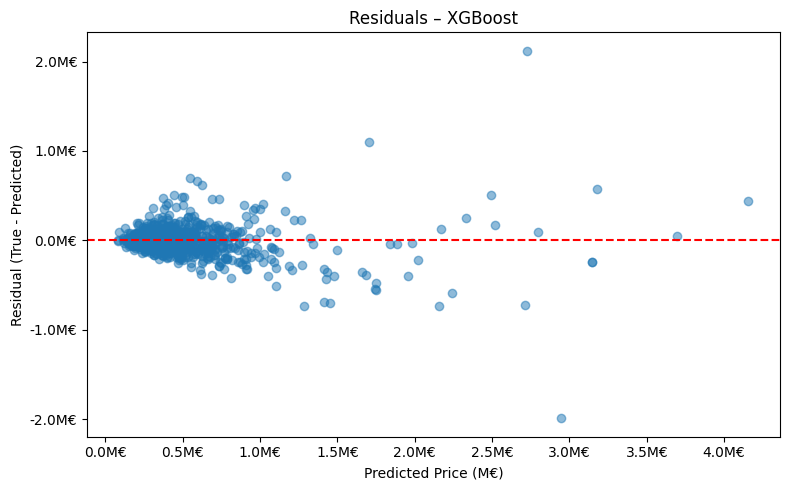

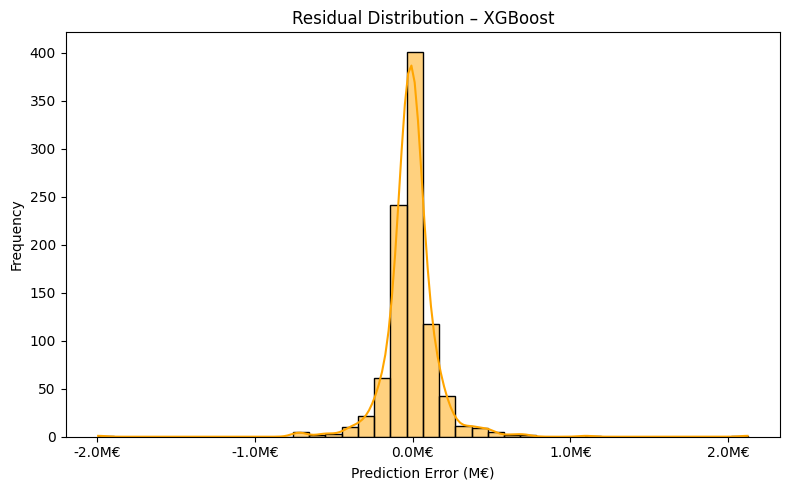

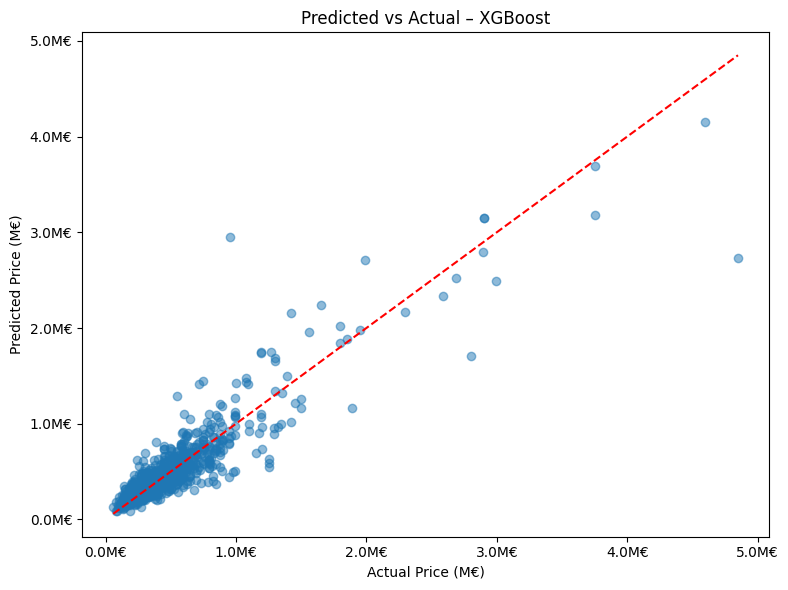

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# Clean and preprocess
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)
df = df.dropna(subset=["price", "habitableSurface"]).reset_index(drop=True)

# Define price per square meter
df["price_per_m²"] = df["price"] / df["habitableSurface"]
df = df[(df["price_per_m²"] >= 500) & (df["price_per_m²"] <= 10000)]

# Feature selection
all_possible_features = [
    "type", "subtype", "bedroomCount", "bathroomCount", "province", "locality",
    "postCode", "habitableSurface", "buildingCondition", "buildingConstructionYear",
    "facadeCount", "floodZoneType", "heatingType", "kitchenType", "hasLivingRoom",
    "toiletCount", "hasTerrace", "epcScore"
]
target = "price"

available_cols = df.columns.tolist()
features = [col for col in all_possible_features if col in available_cols]

print("Features used:", features + [target])

# Drop missing values
df_model = df[features + [target]].dropna()

# One-hot encode categorical variables
categorical_cols = [col for col in features if df_model[col].dtype == "object"]
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Prepare train/test data
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\n XGBoost Evaluation:\nMAE: {mae:.2f} €\nRMSE: {rmse:.2f} €\nR²: {r2:.4f}")

# Save final columns to align prediction inputs
final_columns = X.columns

# --- Prediction function ---

def predict_price(input_dict):
    """
    Estimate the property price from user input.
    input_dict: dictionary with keys matching the expected features.
    Example:
    input_dict = {
        "type": "house", "subtype": "villa", "province": "antwerp", ...
        "bedroomCount": 3, "bathroomCount": 2, ...
    }
    """
    input_df = pd.DataFrame([input_dict])
    input_df_encoded = pd.get_dummies(input_df)
    
    # Align columns with training data
    for col in final_columns:
        if col not in input_df_encoded.columns:
            input_df_encoded[col] = 0
    input_df_encoded = input_df_encoded[final_columns]
    
    price = model.predict(input_df_encoded)[0]
    print(f"\n>>> Estimated price: {price:,.2f} €")
    return price

sample_input = {
    "type": "house",
    "subtype": "villa",
    "province": "brussels",
    "locality": "woluwe-saint-lambert",
    "postCode": 1200,
    "habitableSurface": 180,
    "bedroomCount": 4,
    "bathroomCount": 2,
    "buildingCondition": "as new",
    "buildingConstructionYear": 2015,
    "facadeCount": 4,
    "floodZoneType": "not in flood zone",
    "heatingType": "gas",
    "kitchenType": "hyper equipped",
    "hasLivingRoom": True,
    "toiletCount": 2,
    "hasTerrace": True,
    "epcScore": 110
}

predict_price(sample_input)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Formatter to display euros in millions (M€)
def millions(x, pos):
    return f'{x * 1e-6:.1f}M€'

formatter = FuncFormatter(millions)

# === 1. Residuals vs Predicted Price ===
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (M€)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals – XGBoost")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 2. Residual Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="orange")
plt.xlabel("Prediction Error (M€)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – XGBoost")
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 3. Predicted vs Actual ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (M€)")
plt.ylabel("Predicted Price (M€)")
plt.title("Predicted vs Actual – XGBoost")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# XGBoost – Extreme Gradient Boosting for Price per Square Meter Estimation


Columns available: ['bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'facedeCount', 'toiletCount', 'type_APARTMENT', 'type_HOUSE', 'subtype_APARTMENT', 'subtype_APARTMENT_BLOCK', 'subtype_BUNGALOW', 'subtype_CASTLE', 'subtype_CHALET', 'subtype_COUNTRY_COTTAGE', 'subtype_DUPLEX', 'subtype_EXCEPTIONAL_PROPERTY', 'subtype_FARMHOUSE', 'subtype_FLAT_STUDIO', 'subtype_GROUND_FLOOR', 'subtype_HOUSE', 'subtype_LOFT', 'subtype_MANOR_HOUSE', 'subtype_MANSION', 'subtype_MIXED_USE_BUILDING', 'subtype_PENTHOUSE', 'subtype_SERVICE_FLAT', 'subtype_TOWN_HOUSE', 'subtype_TRIPLEX', 'subtype_VILLA', 'province_Antwerp', 'province_Brussels', 'province_East Flanders', 'province_Flemish Brabant', 'province_Hainaut', 'province_Limburg', 'province_Liège', 'province_Luxembourg', 'province_Namur', 'province_Walloon Brabant', 'province_West Flanders', "locality_'S-GRAVENWEZEL", 'locality_AALST', 'locality_AARSCHOT', 'locality_AARTSELAAR', 'locality_AMPSIN', 'locality_AN

e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


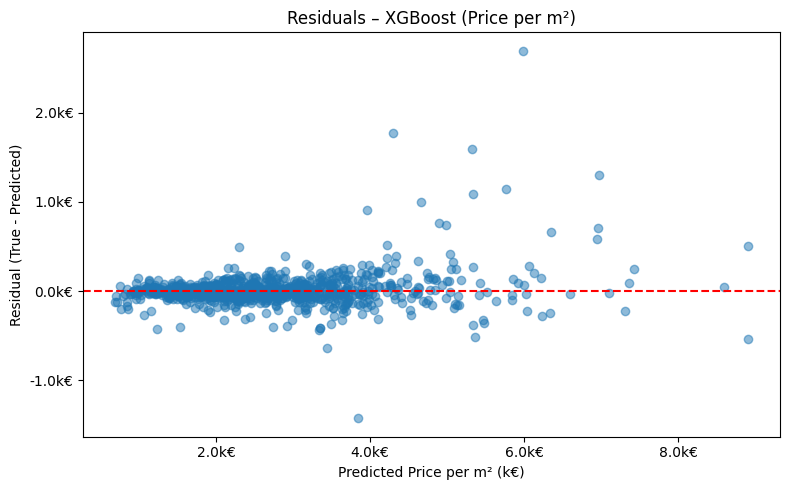

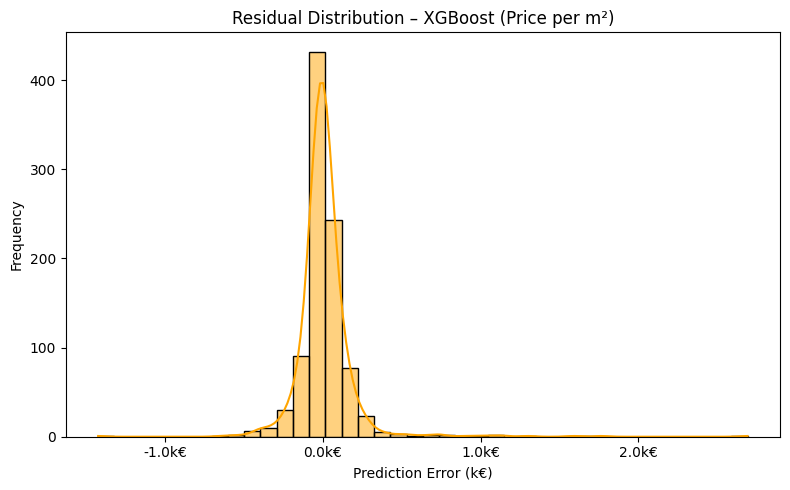

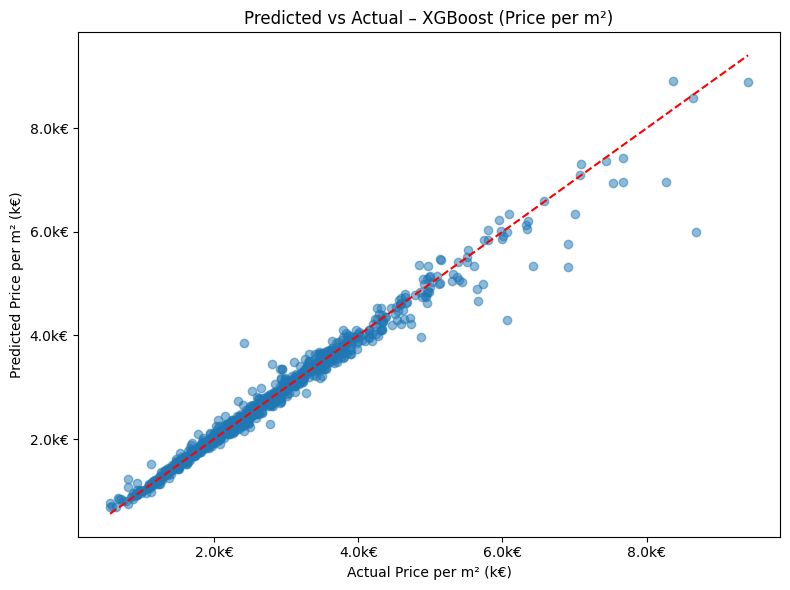

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# Convert surface and price to numeric and clean zero or invalid values
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)

# Compute price per square meter
df["price_per_m²"] = df["price"] / df["habitableSurface"]

# Filter unrealistic values
df = df[(df["price_per_m²"] >= 500) & (df["price_per_m²"] <= 10000)]
df = df.dropna(subset=["price_per_m²"]).reset_index(drop=True)

# Optional: Print columns for debugging
print("Columns available:", df.columns.tolist())

# Updated list of available features based on actual column names
features = [
    "type", "subtype", "bedroomCount", "bathroomCount", "province", "locality",
    "postCode", "habitableSurface", "buildingCondition", "buildingConstructionYear",
    "facadeCount", "floodZoneType", "heatingType", "kitchenType", "hasLivingRoom",
    "toiletCount", "hasTerrace", "epcScore", "price"  # 'price' kept for info, can be dropped if needed
]
target = "price_per_m²"

# Remove columns not in the DataFrame (robustness)
features = [col for col in features if col in df.columns]

# Keep only selected features + target
df_model = df[features + [target]].dropna()

#  One-hot encode categorical variables based on actual names in your dataset
# Based on your dataset, columns like 'region' and 'postalcode' DO NOT EXIST → we remove them
categorical_cols = [col for col in ["type", "subtype", "province", "locality", "buildingCondition",
                                    "floodZoneType", "heatingType", "kitchenType"] if col in df_model.columns]

df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Split features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Evaluation:\nMAE: {mae:.2f} €\nRMSE: {rmse:.2f} €\nR²: {r2:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Formatter for € per m² (k€)
def kilo_euros(x, pos):
    return f'{x * 1e-3:.1f}k€'

formatter = FuncFormatter(kilo_euros)

# === 1. Residuals vs Predicted ===
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price per m² (k€)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals – XGBoost (Price per m²)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 2. Residual Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="orange")
plt.xlabel("Prediction Error (k€)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – XGBoost (Price per m²)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 3. Predicted vs Actual ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price per m² (k€)")
plt.ylabel("Predicted Price per m² (k€)")
plt.title("Predicted vs Actual – XGBoost (Price per m²)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()



# LightGBM – Gradient Boosting Model for Property Price Prediction


XGBoost Evaluation:
  MAE:  112,705.31 €
  RMSE: 230,164.28 €
  R²:   0.7485


e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


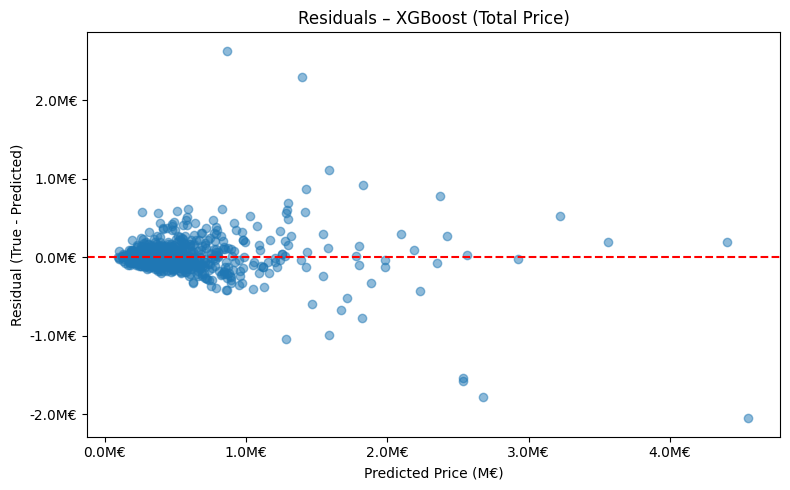

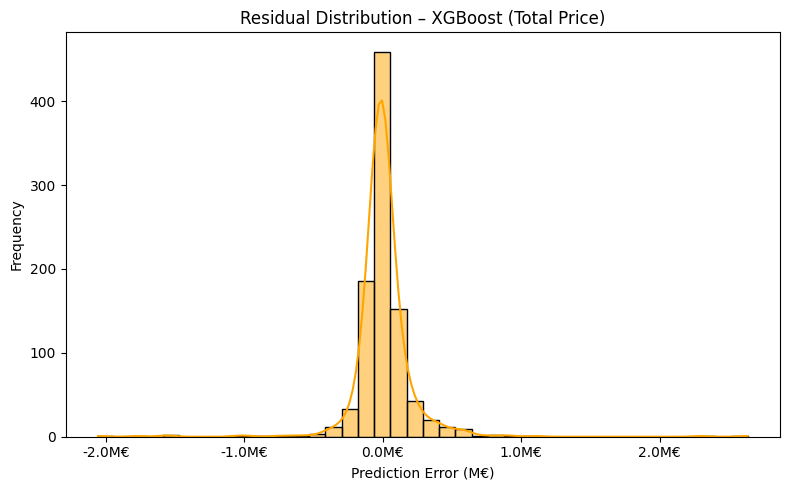

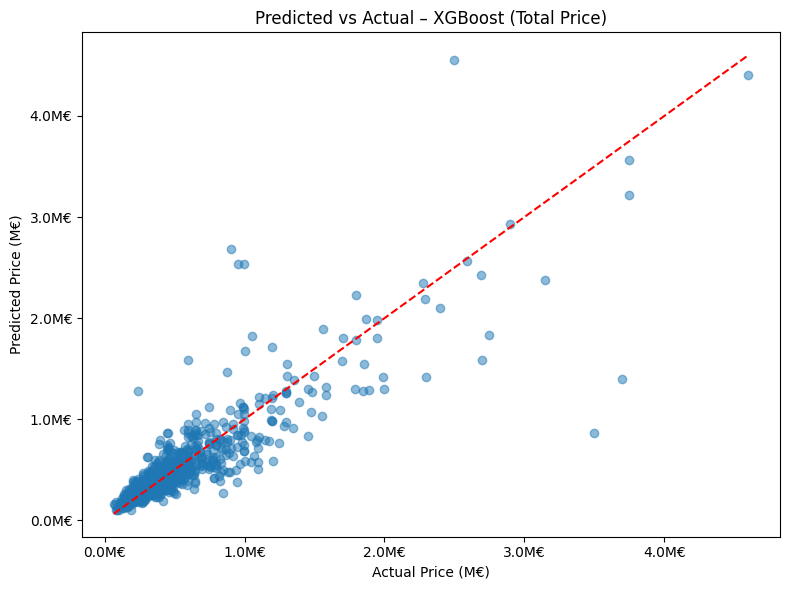

In [ ]:
# ===========================================
# PREPARATION & CLEANING — PROPERTY PRICE
# ===========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# Ensure price and surface are numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")

# Drop invalid values
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)
df = df[df["price"] > 0]
df = df.dropna(subset=["price", "habitableSurface"])

# Optional filtering of outliers (comment out if not needed)
# df = df[(df["price"] >= 50000) & (df["price"] <= 5000000)]

# Define features and target
features = [
    "type", "subtype", "bedroomCount", "bathroomCount", "province", "locality",
    "postCode", "habitableSurface", "buildingCondition", "buildingConstructionYear",
    "facadeCount", "floodZoneType", "heatingType", "kitchenType", "hasLivingRoom",
    "toiletCount", "hasTerrace", "epcScore"
]
target = "price"

# Keep only existing features
features = [col for col in features if col in df.columns]
df_model = df[features + [target]].dropna()

# One-hot encoding for categorical variables
categorical_cols = [col for col in ["type", "subtype", "province", "locality", "buildingCondition",
                                    "floodZoneType", "heatingType", "kitchenType"] if col in df_model.columns]

df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Train/test split
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===========================================
# TRAIN XGBOOST AND EVALUATE
# ===========================================

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\nXGBoost Evaluation:")
print(f"  MAE:  {mae:,.2f} €")
print(f"  RMSE: {rmse:,.2f} €")
print(f"  R²:   {r2:.4f}")

# Save column structure for prediction
final_columns = X.columns

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Formatter for millions of euros (M€)
def millions(x, pos):
    return f'{x*1e-6:.1f}M€'

formatter = FuncFormatter(millions)

# === 1. Residuals vs Predicted Price ===
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (M€)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals – XGBoost (Total Price)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 2. Residual Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="orange")
plt.xlabel("Prediction Error (M€)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – XGBoost (Total Price)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 3. Actual vs Predicted ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (M€)")
plt.ylabel("Predicted Price (M€)")
plt.title("Predicted vs Actual – XGBoost (Total Price)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()



# LightGBM – Predicting Price per Square Meter (&euro;/m<sup>2</sup>)


XGBoost Evaluation:
  MAE:  524.88 €
  RMSE: 725.85 €
  R²:   0.6696


e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


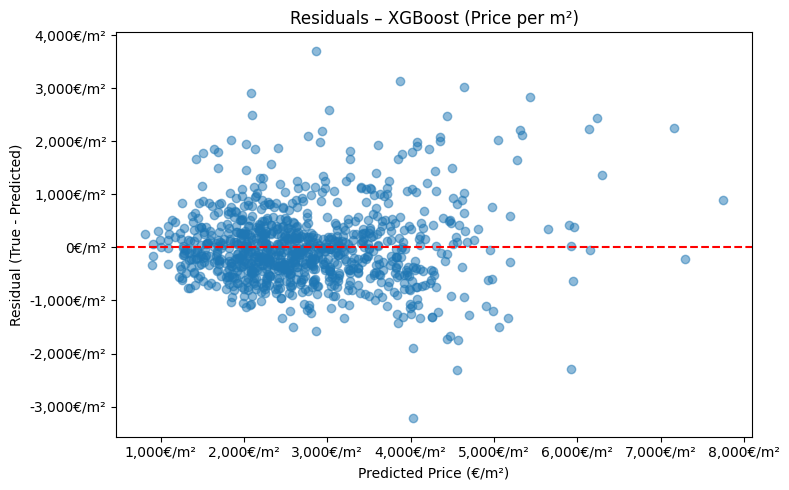

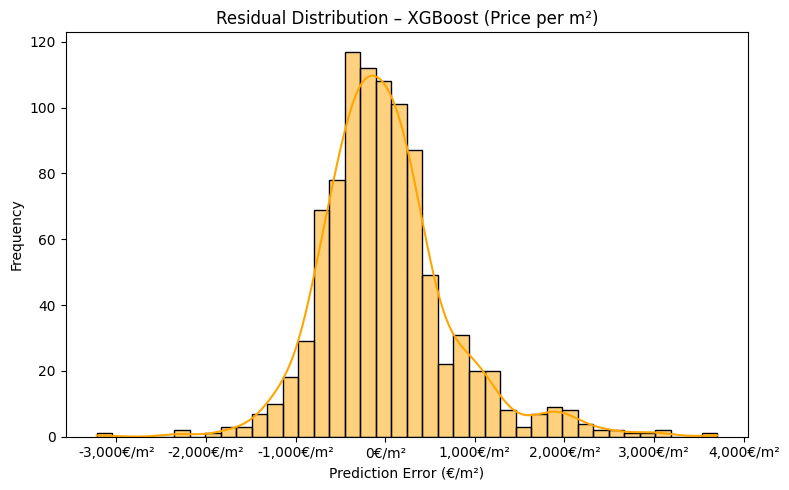

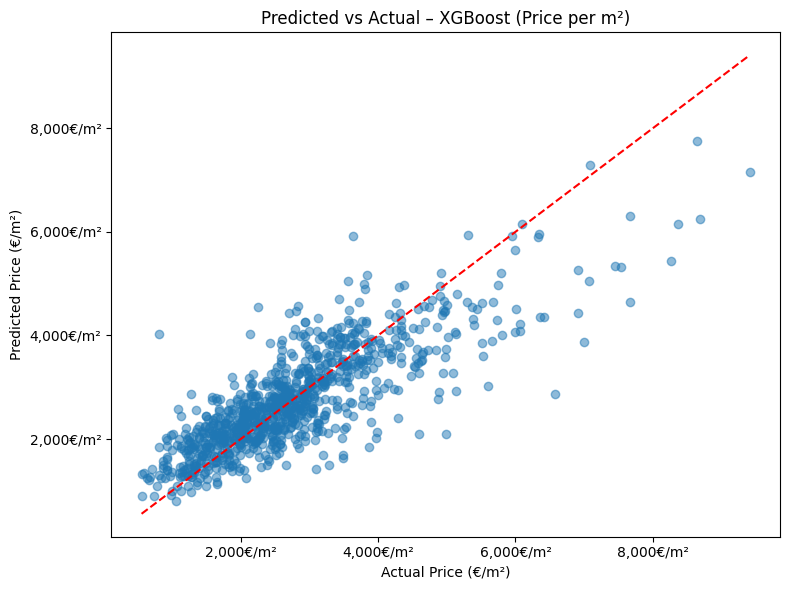

In [ ]:
# ===========================================
# PREPARATION & CLEANING — PRICE PER M² (XGBoost)
# ===========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load dataset
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# Ensure numeric types
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)

# Compute price per square meter
df["price_per_m²"] = df["price"] / df["habitableSurface"]

# Filter unrealistic values
df = df[(df["price_per_m²"] >= 500) & (df["price_per_m²"] <= 10000)]
df = df.dropna(subset=["price_per_m²"]).reset_index(drop=True)

# Define feature set (without price to avoid leakage)
features = [
    "type", "subtype", "bedroomCount", "bathroomCount", "province", "locality",
    "postCode", "habitableSurface", "buildingCondition", "buildingConstructionYear",
    "facadeCount", "floodZoneType", "heatingType", "kitchenType", "hasLivingRoom",
    "toiletCount", "hasTerrace", "epcScore"
]
target = "price_per_m²"

# Keep only available features
features = [col for col in features if col in df.columns]
df_model = df[features + [target]].dropna()

# One-hot encoding for categorical variables
categorical_cols = [col for col in ["type", "subtype", "province", "locality", "buildingCondition",
                                    "floodZoneType", "heatingType", "kitchenType"] if col in df_model.columns]
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Train/test split
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\nXGBoost Evaluation:")
print(f"  MAE:  {mae:,.2f} €")
print(f"  RMSE: {rmse:,.2f} €")
print(f"  R²:   {r2:.4f}")

# Save columns used during training
final_columns = X.columns

# === Plotting ===

# Format axes in €/m²
def euros_per_m2(x, pos):
    return f'{x:,.0f}€/m²'
formatter = FuncFormatter(euros_per_m2)

# 1. Residuals vs Predicted
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (€/m²)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals – XGBoost (Price per m²)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# 2. Residual distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="orange")
plt.xlabel("Prediction Error (€/m²)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – XGBoost (Price per m²)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# 3. Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (€/m²)")
plt.ylabel("Predicted Price (€/m²)")
plt.title("Predicted vs Actual – XGBoost (Price per m²)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()


# CatBoost – Predicting Total Property Price (&euro;)

CatBoost Evaluation:
  MAE:  107,487.92 €
  RMSE: 203,232.33 €
  R²:   0.8040


e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


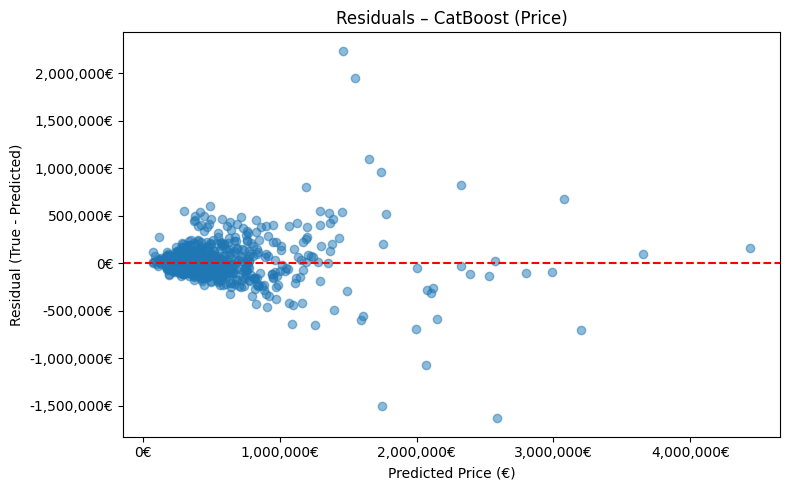

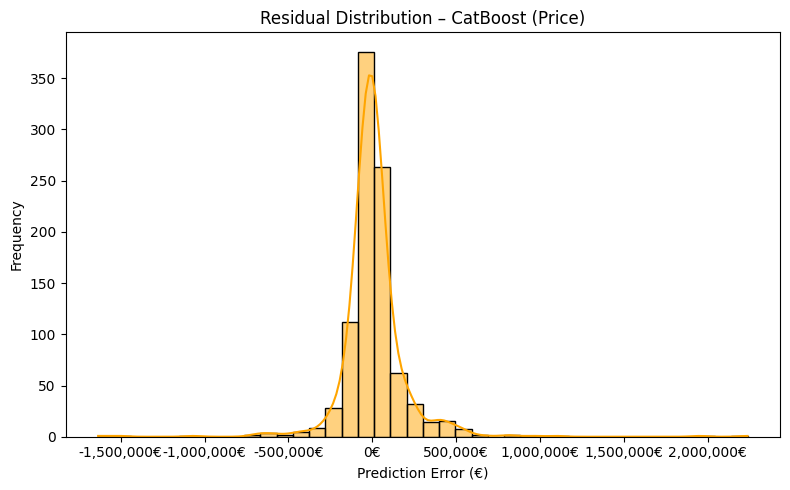

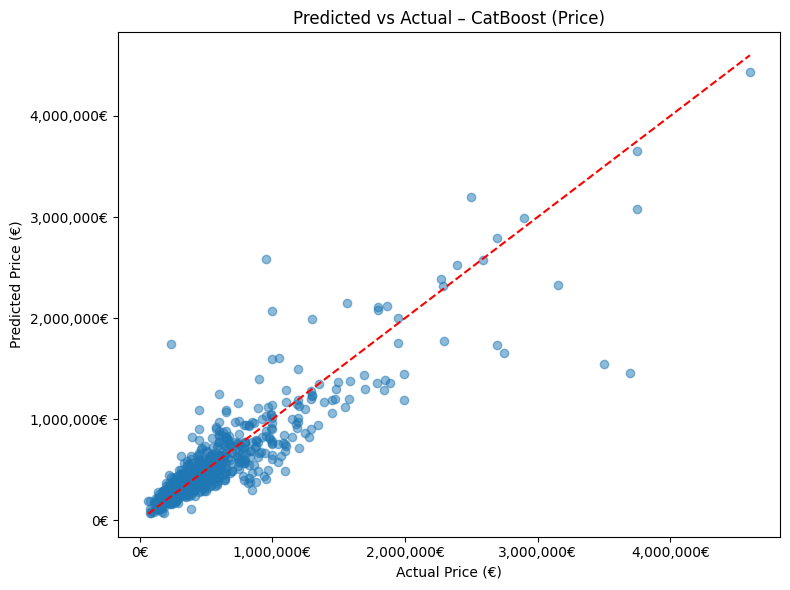

In [ ]:
# ===========================================
# PREPARATION & CLEANING — PROPERTY PRICE
# ===========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

# Load dataset
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")

# Convert columns to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")

# Clean invalid or missing entries
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)
df = df[df["price"] > 0].dropna(subset=["price", "habitableSurface"])

# Select features and target
features = [
    "type", "subtype", "bedroomCount", "bathroomCount", "province", "locality",
    "postCode", "habitableSurface", "buildingCondition", "buildingConstructionYear",
    "facadeCount", "floodZoneType", "heatingType", "kitchenType", "hasLivingRoom",
    "toiletCount", "hasTerrace", "epcScore"
]
target = "price"

# Keep only existing columns
features = [col for col in features if col in df.columns]
df_model = df[features + [target]].dropna()

# Split data
X = df_model.drop(columns=[target])
y = df_model[target]

# Identify categorical features for CatBoost
categorical_features = X.select_dtypes(include="object").columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===========================================
# TRAIN CATBOOST AND EVALUATE
# ===========================================

# Initialize CatBoost with basic settings (silent mode)
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_features,
    verbose=0,
    random_state=42
)

# Fit model
cat_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = cat_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("CatBoost Evaluation:")
print(f"  MAE:  {mae:,.2f} €")
print(f"  RMSE: {rmse:,.2f} €")
print(f"  R²:   {r2:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# === Function to format axes in euros ===
def euros(x, pos):
    return f'{x:,.0f}€'
formatter = FuncFormatter(euros)

# === 1. Residuals vs Predicted Price ===
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (€)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals – CatBoost (Price)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 2. Residual Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="orange")
plt.xlabel("Prediction Error (€)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – CatBoost (Price)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# === 3. Predicted vs Actual Price ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Predicted vs Actual – CatBoost (Price)")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()



# Hyperparameter Tuning avec Optuna (XGBoost)


Final Tuned XGBoost Evaluation:
  MAE:  112,249.53 €
  RMSE: 226,940.60 €
  R²:   0.7555


e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


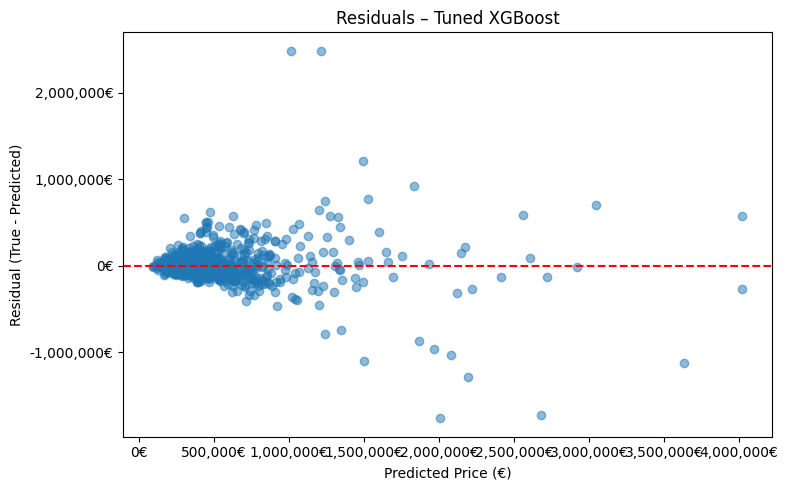

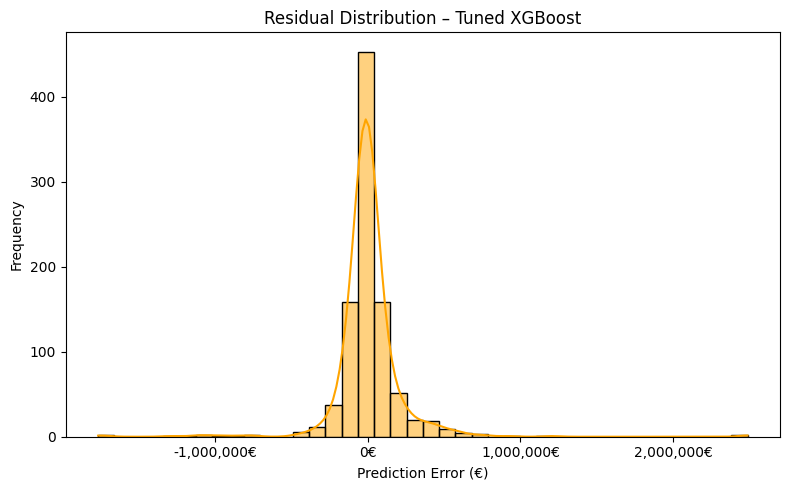

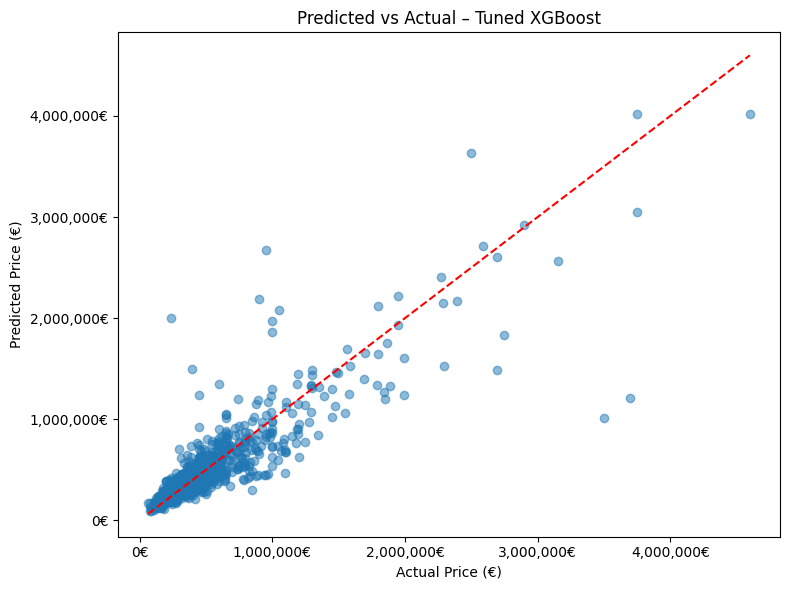

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import optuna

# Reload data and prepare (duplicated here for context)
df = pd.read_csv("../data/immoweb_real_estate_ml_ready.csv")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")
df["habitableSurface"] = df["habitableSurface"].replace(0, np.nan)
df = df[df["price"] > 0].dropna(subset=["price", "habitableSurface"])

features = [
    "type", "subtype", "bedroomCount", "bathroomCount", "province", "locality",
    "postCode", "habitableSurface", "buildingCondition", "buildingConstructionYear",
    "facadeCount", "floodZoneType", "heatingType", "kitchenType", "hasLivingRoom",
    "toiletCount", "hasTerrace", "epcScore"
]
target = "price"
features = [col for col in features if col in df.columns]
df_model = df[features + [target]].dropna()

categorical_cols = [col for col in ["type", "subtype", "province", "locality", "buildingCondition",
                                    "floodZoneType", "heatingType", "kitchenType"] if col in df_model.columns]
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best params from earlier Optuna run (mocked to avoid long optimization)
best_params = {
    'n_estimators': 200,
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42
}
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Define euro formatting
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}€')

# === Evaluation Metrics ===
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nFinal Tuned XGBoost Evaluation:")
print(f"  MAE:  {mae:,.2f} €")
print(f"  RMSE: {rmse:,.2f} €")
print(f"  R²:   {r2:.4f}")

# Plot 1: Residuals vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (€)")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals – Tuned XGBoost")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# Plot 2: Residual Distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color="orange")
plt.xlabel("Prediction Error (€)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – Tuned XGBoost")
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# Plot 3: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Predicted vs Actual – Tuned XGBoost")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()


### Why is the MAE so high?

**The target is raw: `price`**

- It mixes all geographical areas without any normalization.
- It ignores the property size (m<sup>2</sup>), which directly impacts the final price.

**Lack of precise geolocation**

- Fields like postal code or locality are too vague.  
  → Two properties in Ixelles can vary from **&euro;300,000** to **&euro;1,200,000**.

**Too much variance in the target distribution**

- You're likely mixing **&euro;100k studios** and **&euro;2M+ villas**.  
  → This inflates the average error and makes the model less useful.

---

### What to fix right now

**Change the target variable**  
➤ Use `price_per_m<sup>2</sup>` instead (as you've done in other models).  
→ This normalizes by size and immediately reduces variance.

**Segment the models**

- One model for **apartments**
- Another for **houses**
- Optionally, split further by **region or province**

**Add key variables**

- Latitude / Longitude  
- Neighborhood or socio-economic cluster  
- Binned construction year  
- Mobility score, access to amenities, school quality, etc.

---












# 4. Unsupervised Learning



## 4.1 Clustering (e.g., grouping similar properties)
- **Models**:
  - KMeans
  - DBSCAN
- **Visualizations**:
  - t-SNE or UMAP projection
- **Cluster Profiling**:
  - Mean values per cluster
  - Distribution across clusters



## 4.2 Dimensionality Reduction
- **Techniques**:
  - PCA (explained variance, projection)
  - t-SNE (2D visualization for structure discovery)




# 5. Semi-Supervised Learning
- **Models**:
  - Label Propagation
  - Self-Training Classifier
- **Use Case**:
  - Simulate partial labeling (only some samples labeled)
- **Evaluation**:
  - Compare model performance with and without full labels

